<a href="https://colab.research.google.com/github/FinLZ/NEUR265_Zakas/blob/main/NEUR265_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import relevant modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Import data
ad = pd.read_csv('https://raw.githubusercontent.com/FinLZ/NEUR265_Zakas/main/alzheimers_modified_data_final_project.csv')
ad

,Donor ID,total aSyn positive area_Grey matter,total GFAP positive area_Grey matter,ripa abeta42_Grey matter,ripa tTau_Grey matter,APOE4 Status,Cognitive Status
0,H19.33.004,0.000000,1.092193e+06,0.971579,1552.414737,N,No dementia
1,H20.33.001,0.000000,1.393363e+06,2.744211,756.090526,N,No dementia
2,H20.33.002,0.000000,2.491895e+06,0.147158,313.525263,N,No dementia
3,H20.33.004,0.000000,6.546220e+06,80.266316,318.528421,Y,Dementia
4,H20.33.005,0.000000,1.384955e+06,16.156842,107.348421,N,No dementia
...,...,...,...,...,...,...,...
79,H21.33.043,0.000000,1.649817e+06,29.892632,611.000000,N,Dementia
80,H21.33.044,0.000000,1.107429e+07,33.637895,417.894737,N,Dementia
81,H21.33.045,0.000000,1.499963e+07,53.878947,147.565263,Y,Dementia
82,H21.33.046,37597.474130,7.858908e+06,19.195789,1124.777383,N,Dementia


In [3]:
#Convert dataframe into usable numpy arrays
a4_GFAP = np.array(ad.loc[ad['APOE4 Status'] == 'Y', ['total GFAP positive area_Grey matter']])
a4_aSyn = np.array(ad.loc[ad['APOE4 Status'] == 'Y', ['total aSyn positive area_Grey matter']])
na_GFAP = np.array(ad.loc[ad['APOE4 Status'] == 'N', ['total GFAP positive area_Grey matter']])
na_aSyn = np.array(ad.loc[ad['APOE4 Status'] == 'N', ['total aSyn positive area_Grey matter']])
D_Tau = np.array(ad.loc[ad['Cognitive Status'] == 'Dementia', ['ripa tTau_Grey matter']])
D_Abeta = np.array(ad.loc[ad['Cognitive Status'] == 'Dementia', ['ripa abeta42_Grey matter']])
ND_Tau = np.array(ad.loc[ad['Cognitive Status'] == 'No dementia', ['ripa tTau_Grey matter']])
ND_Abeta = np.array(ad.loc[ad['Cognitive Status'] == 'No dementia', ['ripa abeta42_Grey matter']])

In [33]:
print(ad['Cognitive Status'].value_counts())
print(ad['APOE4 Status'].value_counts())

No dementia    42
Dementia       42
Name: Cognitive Status, dtype: int64
N    59
Y    25
Name: APOE4 Status, dtype: int64


Text(0.5, 0.98, 'Distribution of Grouping Variables')

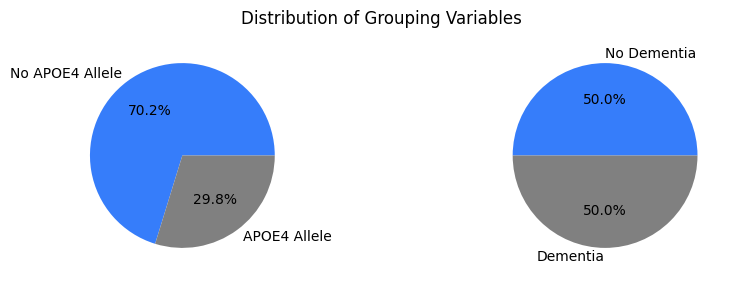

In [15]:
#Visualizing distributions of IVs
fig, ax = plt.subplots(1,2, figsize = (10,3))
ax[0].pie(ad['APOE4 Status'].value_counts(), autopct = '%1.1f%%', labels = ['No APOE4 Allele', 'APOE4 Allele'], colors = ['#367DFA', 'grey'])
ax[1].pie(ad['Cognitive Status'].value_counts(), autopct = '%1.1f%%', labels = ['No Dementia', 'Dementia'], colors = ['#367DFA', 'grey'])
fig.suptitle('Distribution of Grouping Variables')

In [35]:
print(stats.skewtest(ad['total aSyn positive area_Grey matter']))
print(stats.skewtest(ad['total GFAP positive area_Grey matter']))
print(stats.skewtest(ad['ripa tTau_Grey matter']))
print(stats.skewtest(ad['ripa abeta42_Grey matter']))

SkewtestResult(statistic=7.535305157616585, pvalue=4.8719414334374735e-14)
SkewtestResult(statistic=4.735953946912105, pvalue=2.180270975822916e-06)
SkewtestResult(statistic=10.125078615999783, pvalue=4.276349448984406e-24)
SkewtestResult(statistic=9.317762422885327, pvalue=1.1881956978034194e-20)


[Text(0.5, 1.0, 'abeta42 distribution'),
 Text(0.5, 0, 'total abeta42 positive area'),
 Text(0, 0.5, 'value counts')]

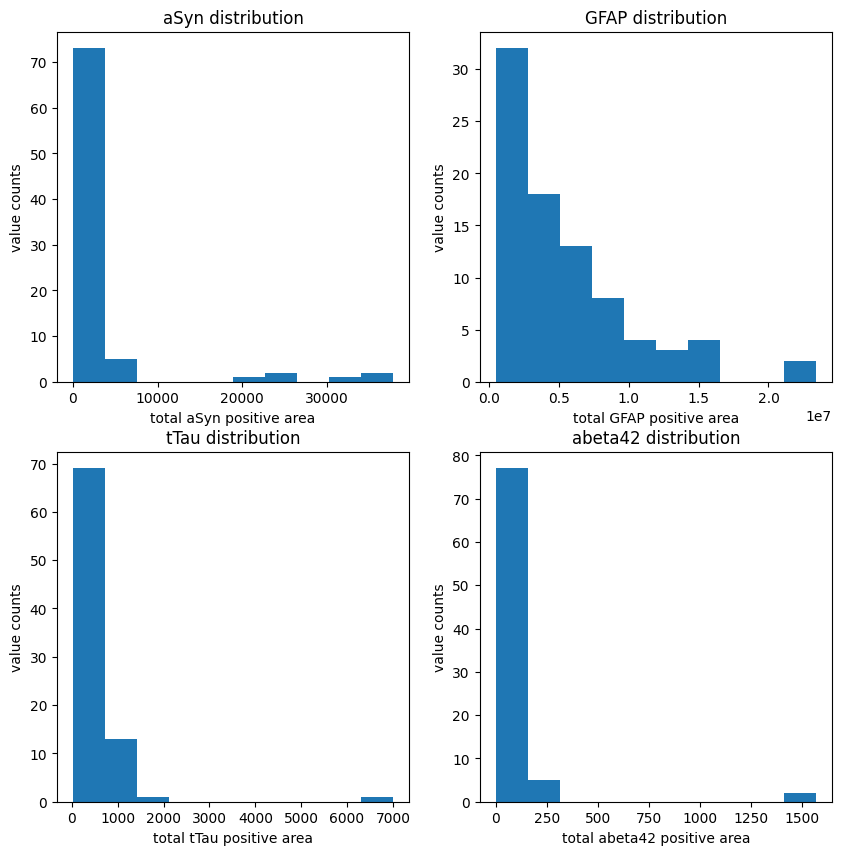

In [5]:
#Visualizing distributions of DVs

fig,ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].hist(ad['total aSyn positive area_Grey matter'], 10)
ax[0,0].set(title = 'aSyn distribution', xlabel = 'total aSyn positive area', ylabel ='value counts')
ax[0,1].hist(ad['total GFAP positive area_Grey matter'], 10)
ax[0,1].set(title = 'GFAP distribution', xlabel = 'total GFAP positive area', ylabel ='value counts')
ax[1,0].hist(ad['ripa tTau_Grey matter'], 10)
ax[1,0].set(title = 'tTau distribution', xlabel = 'total tTau positive area', ylabel ='value counts')
ax[1,1].hist(ad['ripa abeta42_Grey matter'], 10)
ax[1,1].set(title = 'abeta42 distribution', xlabel = 'total abeta42 positive area', ylabel ='value counts')

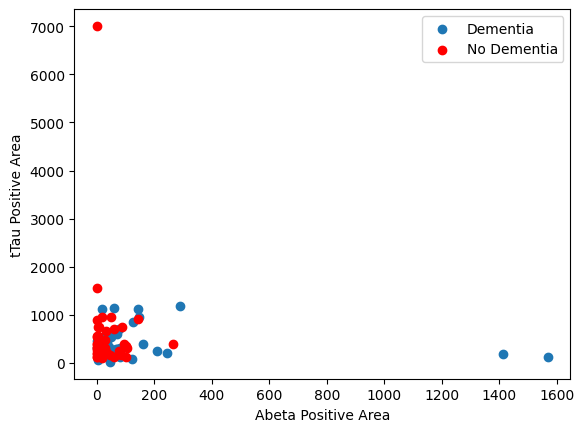

In [18]:
#Relationships between abeta and Tau
plt.scatter(D_Abeta, D_Tau, label ='Dementia')
plt.scatter(ND_Abeta, ND_Tau, label = 'No Dementia', color = 'red')
plt.xlabel('Abeta Positive Area')
plt.ylabel('tTau Positive Area')
plt.legend()


In [36]:
print(stats.pearsonr(a4_GFAP.flatten(), a4_aSyn.flatten()))
print(stats.pearsonr(na_GFAP.flatten(), na_aSyn.flatten()))
print(stats.pearsonr(D_Abeta.flatten(), D_Tau.flatten()))
print(stats.pearsonr(ND_Abeta.flatten(), ND_Tau.flatten()))

PearsonRResult(statistic=0.06496889519961875, pvalue=0.7576716801550127)
PearsonRResult(statistic=0.12384928038970419, pvalue=0.35001774911375805)
PearsonRResult(statistic=-0.11216553668688949, pvalue=0.4794328748668228)
PearsonRResult(statistic=-0.11299851425336688, pvalue=0.47615468584373)


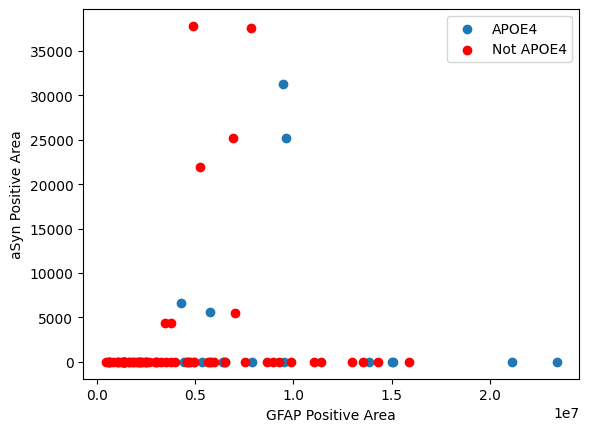

In [73]:
#Relationships between abeta and Tau
plt.scatter(a4_GFAP, a4_aSyn, label ='APOE4')
plt.scatter(na_GFAP, na_aSyn, label = 'Not APOE4', color = 'red')
plt.xlabel('GFAP Positive Area')
plt.ylabel('aSyn Positive Area')
plt.legend()
plt.show()

[Text(0.5, 1.0, 'Abeta Protein Distribution')]

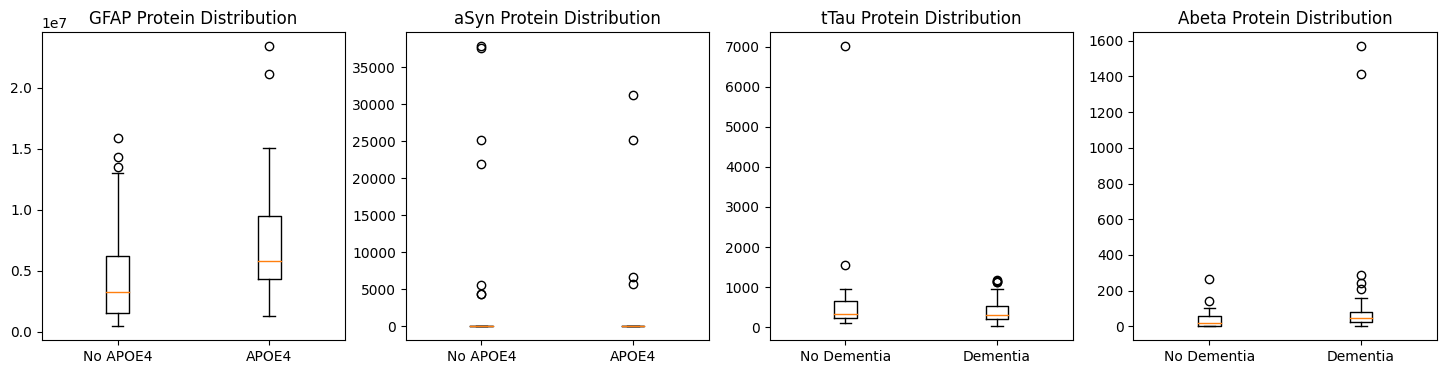

In [105]:
#Distributions of DV by group
fig, ax = plt.subplots(1,4, figsize = (18,4))
#GFAP boxplot
GFAP_data = [na_GFAP.flatten(), a4_GFAP.flatten()]
ax[0].boxplot(GFAP_data)
ax[0].set_xticklabels(['No APOE4', 'APOE4'])
ax[0].set(title = 'GFAP Protein Distribution')
#aSyn boxplot
aSyn_data = [na_aSyn.flatten(), a4_aSyn.flatten()]
ax[1].boxplot(aSyn_data)
ax[1].set_xticklabels(['No APOE4', 'APOE4'])
ax[1].set(title = 'aSyn Protein Distribution')
#tTau boxplot
Tau_data = [ND_Tau.flatten(), D_Tau.flatten()]
ax[2].boxplot(Tau_data)
ax[2].set_xticklabels(['No Dementia', 'Dementia'])
ax[2].set(title='tTau Protein Distribution')
#abeta boxplot
abeta_data = [ND_Abeta.flatten(), D_Abeta.flatten()]
ax[3].boxplot(abeta_data)
ax[3].set_xticklabels(['No Dementia', 'Dementia'])
ax[3].set(title='Abeta Protein Distribution')

In [32]:
#Examining significance difference
stats.mannwhitneyu(a4_GFAP.flatten(), na_GFAP.flatten())
stats.mannwhitneyu(a4_aSyn.flatten(), na_aSyn.flatten())
stats.mannwhitneyu(D_Tau.flatten(), ND_Tau.flatten())
stats.mannwhitneyu(D_Abeta.flatten(), ND_Abeta.flatten())

MannwhitneyuResult(statistic=1242.0, pvalue=0.0012992670750072472)